In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Extracting the data

In [46]:
data=pd.read_csv('/Users/michaelfilletti/Desktop/Uni/AI/Machine Learning/JP/201819_car_insurance_data - 201819.csv')
header=['Class', 'Kilometres', 'MarketValue', 'Year', 'Model']
data2=pd.read_csv('/Users/michaelfilletti/Desktop/Uni/AI/Machine Learning/JP/201819_car_insurance_data - 201718.csv', header=None, names=header)

Based on 2018-19 data

Linear Model - Full dataset

In [56]:
#Creating the dataset
x=np.array(data['Kilometres'])
y=np.array(data['MarketValue'])

#Extracting the parameters
n=len(x)
xy=x*y
x_sqrd=x*x

m=(n*np.sum(xy)-(np.sum(x)*np.sum(y)))/(n*np.sum(x_sqrd)-(np.sum(x))**2)
b=(np.sum(y)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x))/(n*np.sum(x_sqrd)-(np.sum(x))**2)
print('b=',b,'m=',m,)

R_sqrd=1-(np.sum((y-(m*x+b))**2))/(np.sum((y-(np.mean(y)))**2))
print('Our R squared value is',R_sqrd,)

b= 12862.984658711614 m= -0.04997218594604209
Our R squared value is 0.3164586179645069


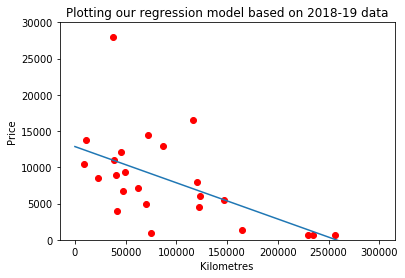

In [57]:
xrange=range(0,300000)
yrange=m*xrange+b
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.ylim(0,30000)
plt.title('Plotting our regression model based on 2018-19 data')
plt.plot(xrange, yrange)
plt.scatter(x,y,color='r')
plt.show()

Linear Model - Trimmed Data - Using Pearson Residuals

b= 11298.871880751902 m= -0.041309970159075046
Our R squared value is 0.38120282282979


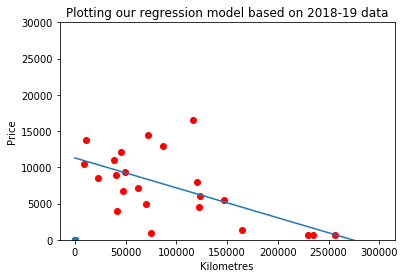

In [23]:
#Using Pearson's Residuals
#Creating the dataset
x_orig=np.array(data['Kilometres'])
y_orig=np.array(data['MarketValue'])

#Calculating Pearsons Residuals
PR=(y_orig-np.mean(y_orig))/np.sqrt(np.var(y_orig))
plt.scatter(range(0,len(y_orig)),PR)
#This tells us that the 20th data point seems to be an outlier
x=np.delete(x_orig,20)
y=np.delete(y_orig,20)

#Extracting the parameters
n=len(x)
xy=x*y
x_sqrd=x*x

m=(n*np.sum(xy)-(np.sum(x)*np.sum(y)))/(n*np.sum(x_sqrd)-(np.sum(x))**2)
b=(np.sum(y)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x))/(n*np.sum(x_sqrd)-(np.sum(x))**2)
print('b=',b,'m=',m,)

R_sqrd=1-(np.sum((y-(m*x+b))**2))/(np.sum((y-(np.mean(y)))**2))
print('Our R squared value is',R_sqrd,)

xrange=range(0,300000)
yrange=m*xrange+b
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.ylim(0,30000)
plt.title('Plotting our regression model based on 2018-19 data')
plt.plot(xrange, yrange)
plt.scatter(x,y,color='r')
plt.show()

Linear Model - Trimmed Data - Using Intuition

b= 11512.96362785616 m= -0.042628086092896325
Our R squared value is 0.3871159409105942


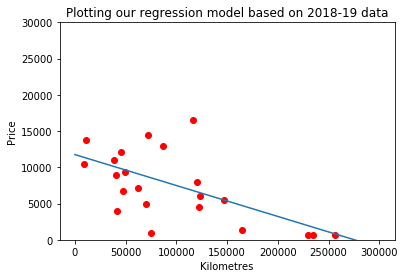

In [55]:
#Using Intuition
#Creating the dataset
x_orig=np.array(data['Kilometres'])
y_orig=np.array(data['MarketValue'])

#From our data graph we can see that points 9 and 20 seem to be outliers in the data
x=np.delete(x_orig,[9,20])
y=np.delete(y_orig,[9,20])

#Extracting the parameters
n=len(x)
xy=x*y
x_sqrd=x*x

m2=(n*np.sum(xy)-(np.sum(x)*np.sum(y)))/(n*np.sum(x_sqrd)-(np.sum(x))**2)
b2=(np.sum(y)*np.sum(x_sqrd)-np.sum(xy)*np.sum(x))/(n*np.sum(x_sqrd)-(np.sum(x))**2)
print('b=',b2,'m=',m2,)

R_sqrd=1-(np.sum((y-(m2*x+b2))**2))/(np.sum((y-(np.mean(y)))**2))
print('Our R squared value is',R_sqrd,)

xrange2=range(0,300000)
yrange2=m*xrange2+b
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.ylim(0,30000)
plt.title('Plotting our regression model based on 2018-19 data')
plt.plot(xrange2, yrange2)
plt.scatter(x,y,color='r')
plt.show()

-----

Testing our Models

In [48]:
data3=pd.read_csv('/Users/michaelfilletti/Desktop/Uni/AI/Machine Learning/JP/CarTestSet.csv')
x_test=np.array(data3['Kilometres'])
y_test=np.array(data3['MarketValue'])

Model 1 - Linear Regression - Full Dataset

-0.09413298842082929


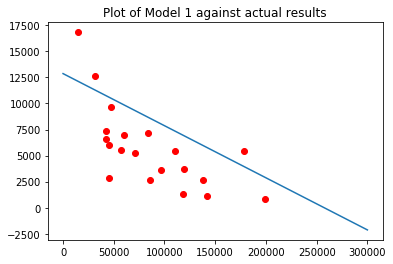

In [58]:
y_fit=m*x_test+b

#Compare results of our fitted y values against the actual y values
R_sqrd=1-(np.sum((y_test-y_fit)**2))/(np.sum((y_test-(np.mean(y_test)))**2))
print(R_sqrd)

plt.figure()
plt.title('Plot of Model 1 against actual results')
plt.scatter(x_test,y_test,color='r')
plt.plot(xrange, yrange)
plt.show()

Model 2 - Linear Regression - Excluded Outlier Dataset

0.13420260743608514


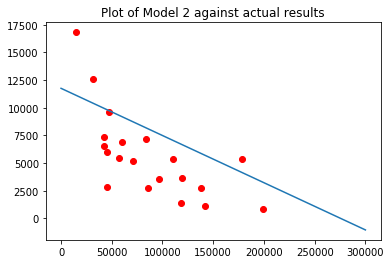

In [59]:
y_fit=m2*x_test+b2

#Compare results of our fitted y values against the actual y values
R_sqrd=1-(np.sum((y_test-y_fit)**2))/(np.sum((y_test-(np.mean(y_test)))**2))
print(R_sqrd)

plt.figure()
plt.title('Plot of Model 2 against actual results')
plt.scatter(x_test,y_test,color='r')
plt.plot(xrange2, yrange2)
plt.show()